In [323]:
importlib.reload(PreProcessMetadata)
import importlib
import PreProcessMetadata
import PreProcess_NLP
import KG
import pathlib
import networkx as nx

In [324]:
#Angabe allgemeiner Parameter zum Ausführen der Funktionen (einmalig)
pdf_path = ('C:/Users/Jana/LabCode/PDF')
p = pathlib.Path(pdf_path)
files_path = list(p.glob('*.pdf'))

pdf_path_conference = ('C:/Users/Jana/LabCode/AimsAndScope')
p_conference = pathlib.Path(pdf_path_conference)
files_path_conference = list(p_conference.glob('*.pdf'))

path = 'C:/Users/Jana/LabCode/'

In [325]:
#Aufrufe aus PreProcessMetadata
df_pdf_meta = PreProcessMetadata.read_paper_meta(path) #Einlesen der PDF's

                                                                                                                   PDF  \
0                                                                                        matecconf_newtech22_01001.pdf   
1                                                                                        matecconf_newtech22_01010.pdf   
2   Advanced_Mobility_Robustness_Optimization_Models_in_Future_Mobile_Networks_Based_on_Machine_Learning_Solutions.pdf   
3                                                               Anzalone_2022_Mach._Learn.__Sci._Technol._3_035017.pdf   
4                                                             Audiogram_Digitization_Tool_for_Audiological_Reports.pdf   
..                                                                                                                 ...   
80                                                              van_Niekerk_2022_Neuromorph._Comput._Eng._2_034012.pdf   
81                      

Exception: Anpassen der Metadaten in Datei notwendig. Datei wird geöffnet. Anschließend Programm neustarten.

In [4]:
#muss nur ausgeführt werden, falls neue paper/Konferenzen dazu kommen
PreProcessMetadata.write_paper_meta(path, df_pdf_meta) #Schreiben der Metadaten in PDF (paper)
PreProcessMetadata.write_conference_meta(path, df_pdf_meta) #Schreiben der Metadaten in PDF (Konferenzen)

In [5]:
#Aufrufe aus PreProcess_NLP(einmalig)
corpus = PreProcess_NLP.build_corpus(files_path) #Bildung des Textcorpus aus papern
conference_corpus = PreProcess_NLP.build_conference(files_path_conference) #Bildung des Textcorpus aus Konferenzen
keyword_list, conference_list = PreProcess_NLP.generate_keywords(corpus, conference_corpus) #Generierung keywords

In [185]:
#Initialerstellung Graph (gerichtet)
G_KG = nx.DiGraph()
G_KG = KG.get_entity_rel(df_pdf_meta, G_KG, keyword_list, conference_list)#Erstellung Inhalt Graph

In [187]:
#muss nur einmalig ausgeführt werden
colors = KG.kg_colors(G_KG)#Farbpalette des Graphen

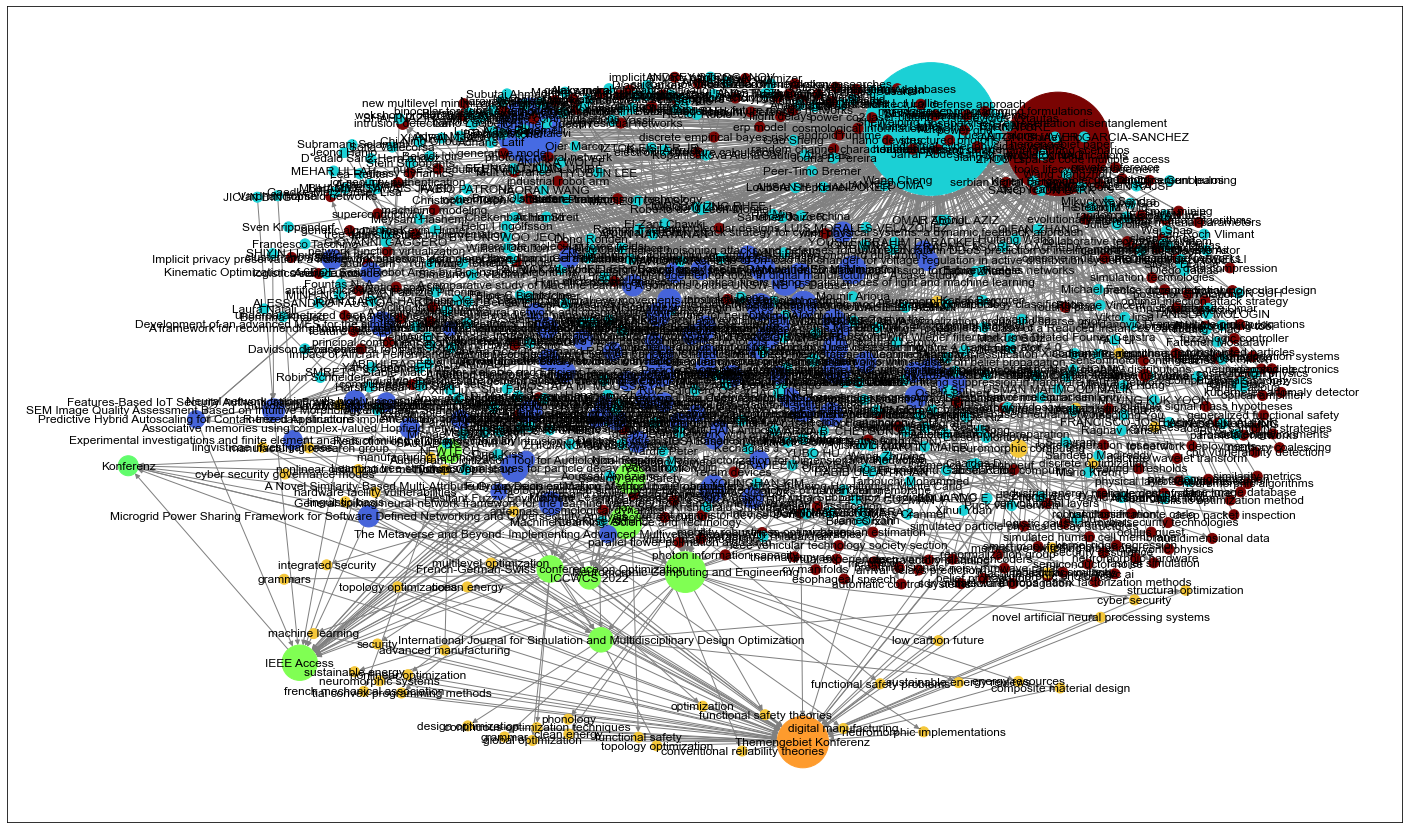

In [212]:
#Anzeigen des Graphen
KG.show_graph(G_KG,colors)

In [263]:
#Zum Abfragen des Graphen (Queries) kann beliebig ost ausgeführt werden
searchy = 'deep learning' # Angabe des Themas
class_result = 'Konferenz' #mögliche Angaben: Autor, Titel, Konferenz oder ''
visited = set() #Erstellung visited als set von bereits besuchten Knoten
erg = {} #Ergebnis dictionary

for n in G_KG.nodes: #Iteration über Knoten vom Graphen
    if n.find(searchy)!= -1: #falls searchy gefunden wird in einem Knoten
        selects=(KG.query_graph(G_KG,n,class_result,visited))
        erg = KG.merge_dictionary(erg, selects) #falls mehrere Knoten gefunden wurden, merge diese noch mal (macht keinen Unterschied falls erg leer)
     
if class_result == 'Autor' or class_result == 'Konferenz':
    del erg['Titel']#Löschung der values vom key Titel falls Autoren gesucht werden sollen
    print('Ergebnisse:',erg)

else:
    dict_date = {'Titel':[]}
    for key,value in erg.items():
        if key == 'Titel':
            if type(value)  == list:
                for v in value:
                    date = G_KG.nodes[v]['date'] #holen Veröffentlichungsdatum
                    v+=str(' veröffentlich: ')+str(date)
                    value = v
                    dict_date['Titel'].append(value)
            else:
                date = G_KG.nodes[value]['date'] #holen Veröffentlichungsdatum
                value+=str(' veröffentlich: ')+str(date)
                dict_date['Titel'].append(value)
                
    erg = {**erg, **dict_date}
    print('Ergebnisse:',erg)

Ergebnisse: {'Thema paper': 'deep learning systems', 'Titel': ['A framework for recommending tourist attractions using deep learning and association rule mining-based methods veröffentlich: 2022']}


In [217]:

x = nx.all_neighbors(G_KG,'Two sparsities are better than one: unlocking the performance benefits of sparse–sparse networks') #Angabe Themengebiet paper oder Themengebiet Konferenz
for n in x:
    print(n)
        
#nx.info(G_KG)
                   

Kevin Hunter
Lawrence Spracklen
Subutai Ahmad
Paper
Neuromorphic Computing and Engineering
sparse networks
activation sparsity
deep learning systems


In [142]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
#Hinzufügen eigener Stopwords
new_words = ["the", "as", "was", "that", "open", "access", "thought", "sees", 
             "agreement", "term", "initially", "people", "eu", "citiations", 
             "de", "authors","com", "citations", "table", "et", "al", "conference", 
             "th", "ieee access", "ieee", "fig", "aaai", "www", "org", "yet", "http","open access" ]
my_stop_words = stop_words.union(new_words)
print(my_stop_words)

{'his', 'does', 'was', 'mightn', "mustn't", 'having', 'then', 'needn', 'other', 'from', "hasn't", 'your', 'and', 'for', 'fig', 'it', 'thought', 'et', 'whom', 't', 'my', 'is', 'most', 'been', "weren't", 'am', 'll', "shan't", 'herself', 'between', 'yourselves', 'our', 'in', 'all', 'yet', 'while', 'he', 'they', "hadn't", "she's", 'very', 'you', 'its', 'the', 'her', 's', 'too', 'de', 'were', 'because', 'com', 'himself', 'she', 'own', 'yourself', 'yours', 'should', 'into', 'wasn', 'term', 'agreement', 'd', 'over', "you're", "it's", 're', 've', 'eu', 'open', 'shouldn', "you'll", 'such', 'al', 'what', 'to', 'above', 'now', 'but', 'some', "wouldn't", 'will', 'than', 'o', 'shan', 'won', 'has', 'did', 'under', "didn't", 'open access', 'table', 'down', 'i', 'are', 'mustn', 'of', 'with', 'didn', "doesn't", 'their', 'ours', 'here', 'only', 'ourselves', "mightn't", 'hers', 'once', 'm', 'more', 'themselves', 'ieee access', "isn't", 'nor', 'aren', "won't", 'how', 'don', 'me', 'about', 'do', 'being', "

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
